# Setup

In [1]:
# This block contains all the libraries required throughout the nb

import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
df.loc[0]

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

Looks like each entry refers to a voilation done by a restaraunt. We can expect multiple entries for the same restaurant.

# Q1 -  Create a unique name for each restaurant

This questions requires string concatenation across multiple columns. Here, each column is being called as a series and series operation is being performed to combine the strings

In [3]:
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE'] + " " + df['BORO']

df['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Q2 - How many restaurants are included in the data?

To access all unique restaurants, we have to access 'restaurant' column. 

Accessing DBA column, wouldn't work because each DBA could have multiple entries.  

In [4]:
num_restaurants = len(df['RESTAURANT'].unique())
num_restaurants

10114

# Q3 - How many chains are there?

First we need to drop duplicate entries of multiple violations. We have done that by choosing restaurant and dba column and then dropping duplicates.

Second, we need to count frequncy of each DBA. We drop restraunt columns now.

The value count gives out a series. We need to filter this series for DBA with frequncy > 1

In [5]:
chains = df[['DBA', 'RESTAURANT']].drop_duplicates()['DBA'].value_counts()
chains = chains[chains > 1]
len(chains)

368

# Q4 - Plot a bar graph of the top 20 most popular chains

chains series contains all the chains and their counts. Chains[:20] will give us top 20 chains because series is already in descending order

<AxesSubplot:>

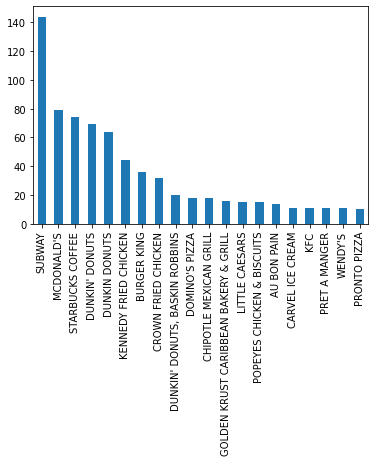

In [6]:
chains[:20].plot(kind = "bar")

# Q5 - What fraction of all restaurants are chain restaurants?

We have already know the number of restaurants from Q2.

The total number of restaurants can be simply calculated by summing the chains series

In [7]:
chain_restaurant_perc = sum(chains) / num_restaurants
chain_restaurant_perc

0.16472216729286138

# Q6 - Plot the number of non-chain restaurants in each boro

First, a new column has been added to data frame. This column annotates if a given restaurant is a chain or not. We already have a series of chains.

Now, we need to filter OUT chain restaurant and "Missing" BOROs

We need to drop duplicate violation entries.

We need to only count only BOROs, so we will keep that column only.

Lastly, we will plot value counts

<AxesSubplot:>

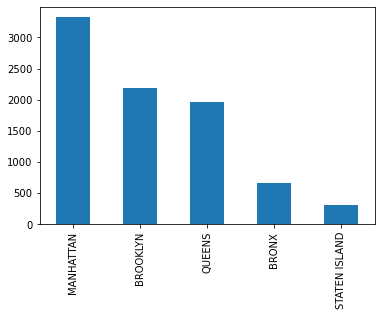

In [8]:
# adding a new column - 'is_chain' tells if a given restaurant is a chain or not.
df['is_chain']  = df['DBA'].apply(lambda x: x in list(chains.index.values))
non_chain_res_boro = df[(df['is_chain'] == False) & (df['BORO'] != 'Missing')]\
                                                    [['RESTAURANT', 'BORO']].\
                                                    drop_duplicates()['BORO'].\
                                                    value_counts()
non_chain_res_boro.plot(kind = 'bar')

# Q7 -  Plot the fraction of non-chain restaurants in each boro. 

We already have series that contains information on count of non-chain restaurants.

We need to get information on total restaurants by each boro. So, just like Q6 we will find all the restaurants by removing the filter.

Finally, a series operation to calculate the fraction.

<AxesSubplot:>

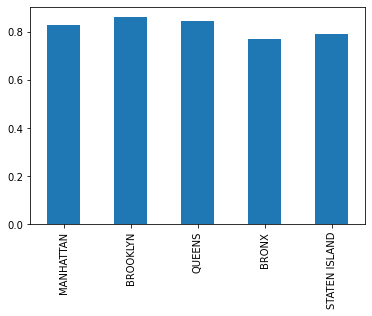

In [9]:
res_boro = df[df['BORO'] != 'Missing'][['RESTAURANT', 'BORO']].\
                                                    drop_duplicates()['BORO'].\
                                                    value_counts()
frac_non_chain = non_chain_res_boro / res_boro
frac_non_chain.plot(kind = 'bar')

Manhattan had the highest number of non-chain restaurants. But the Brooklyn has the highest ratio

# Q8 - Plot the popularity of cuisines

First we need to drop duplicate entries of multiple violations. We have done that by choosing restaurant and cusine column and then dropping duplicates.

Second, we need to count frequncy of each cuisine. We drop restraunt columns now.

The value count gives out a series and we can plot it

<AxesSubplot:>

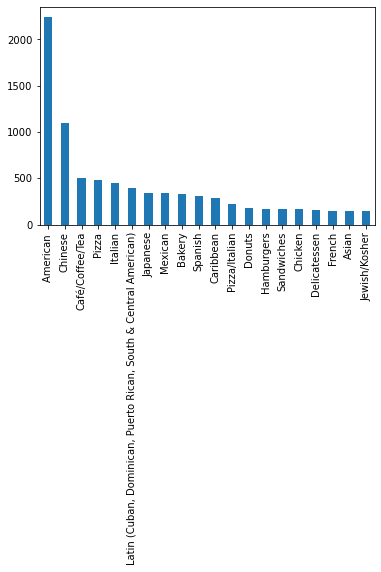

In [10]:
cuisine_popularity = df[['RESTAURANT', 'CUISINE DESCRIPTION']].\
                            drop_duplicates()['CUISINE DESCRIPTION'].\
                            value_counts()
cuisine_popularity[:20].plot(kind = 'bar')

# Q9 - Plot the cuisines among restaurants which never got cited for violations

First, let's filter for NaN VIOLATION CODE fields.

Since, there are no violations, there will be no duplicates.

Like Q8, we will plot popular cuisines

<AxesSubplot:>

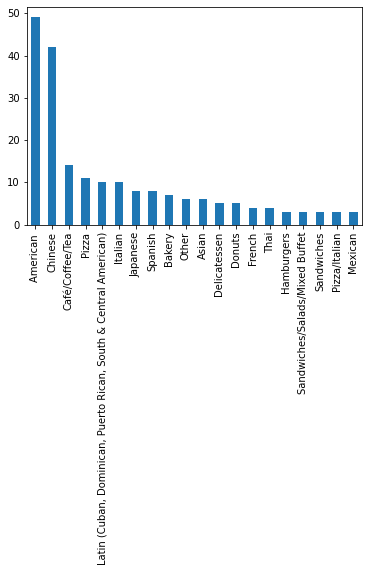

In [11]:
restaurant_with_voilation = list(df[df['VIOLATION CODE'].notnull()]['RESTAURANT'].unique())

df['has_ever_violated'] = df['RESTAURANT'].apply(lambda x: x in restaurant_with_voilation)

clean_cuisine = df[df['has_ever_violated'] == False][["RESTAURANT", "CUISINE DESCRIPTION"]].\
                    drop_duplicates()\
                    ['CUISINE DESCRIPTION'].value_counts()
clean_cuisine[:20].plot(kind = 'bar')

In [12]:
len(restaurant_with_voilation)

9873

# Q10 - What cuisines tend to be the “cleanest”

We already have a series for cuisine popularity. We need to apply a filter find cuisines that have greater than 20 restaurants.

Since in series operations, pd matches the index automatically. So, we can directly use the division operation.

We need to sort the new series in descending order and then pick 10

In [13]:
clean_cuisine_ratio = clean_cuisine / cuisine_popularity[cuisine_popularity > 20]
clean_cuisine_ratio.sort_values(ascending = False)[:10]

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

# Q11 - What are the most common violations in each borough?

First, remove the missing boro rows

Create a crosstab for understanding frequncy of voilation by Boroughs. borough will be on columns and violation as index. Makes like easier as we will search for frequncy on the basis of borough.

Iterate through all the cols and find the idx of row that has max value. (Alt approach use idxmax() function) 

In [14]:
df1 = df[df['BORO'] != 'Missing']
violation_table = pd.crosstab(columns = df1['BORO'], index = df1['VIOLATION CODE'])

print("BORUGH   VOILATION CODE")
for col in list(violation_table.columns.values):
    print("{}    \t {}".format(col, violation_table.index[violation_table[col] == max(violation_table[col])][0]))

BORUGH   VOILATION CODE
BRONX    	 10F
BROOKLYN    	 10F
MANHATTAN    	 10F
QUEENS    	 10F
STATEN ISLAND    	 10F


# Q12 - What are the most common violations per borough, after normalizing for the relative abundance of each violation?

For normalising the table, we need to count of voilation code. df1 contains NO missing rows.

Normalizing - Transpose the table so that series and table index matches. Now fix the transpose to re-apply the code from Q11.

Find max index like we did in Q11 (idxmax is an alternative)

In [15]:
violationFrequency = df1['VIOLATION CODE'].value_counts()

violation_table_normalized = violation_table.T / violationFrequency

#fixing the indexing
violation_table_normalized = violation_table_normalized.T

print("BORUGH   VOILATION CODE")
for col in list(violation_table_normalized.columns.values):
    print("{}    \t {}".format(col, 
                               violation_table_normalized.index[violation_table_normalized[col] ==\
                                                                max(violation_table_normalized[col])][0]))

BORUGH   VOILATION CODE
BRONX    	 04I
BROOKLYN    	 02D
MANHATTAN    	 03E
QUEENS    	 03G
STATEN ISLAND    	 03C


# Q13 - How many phone area codes correspond to a single zipcode?

First create a new column for area code. str function allows you to apply function on each string.

We need all unique combinations of area code and zipcode. Filter those columns and drop duplicates.

Since we are only focused area codes, choose area code column and apply value counts on that column. Filter for area codes that have frequency 1 or area code is associated with only one zipcode.

Calculate length of resulting series

In [16]:
df['area_code'] = df['PHONE'].str[0:3]
area_codes = df[['area_code', 'ZIPCODE']].drop_duplicates()['area_code'].value_counts()
len(area_codes[area_codes == 1])

34

# Q14 -  Find common misspellings of street names

Street type - split the string and choose the last word

Street base - split the string and slice the list to pick everything and drop last word

Street base and Zip - Combined the base and zipcode column. this was created to create an unique street identifier. usually the misspelling occur in the last word.

merged the data frame on itself to get combination of misspellings.

Drop all the irrelevant columns and focus on street type cols.

crosstab gives the frequency of misspellings

reuse the code to find the high occuring misspellings.

In [17]:
df['STREET TYPE'] = df['STREET'].apply(lambda x: x.split()[-1])
df['STREET BASE'] = df['STREET'].apply(lambda x: " ".join(x.split()[:-1]))
df['STREET BASE & ZIP'] = df['STREET BASE'] + " " + df['ZIPCODE']
addresses = df[df['STREET BASE'].notnull()]\
                        [['STREET BASE & ZIP', 'STREET BASE', 'STREET TYPE']].\
                        drop_duplicates()

merged_table = pd.merge(addresses, addresses, 
                        left_on= 'STREET BASE & ZIP', 
                        right_on='STREET BASE & ZIP')

merged_table = merged_table[merged_table['STREET TYPE_y'] != merged_table['STREET TYPE_x']]

misspelling = pd.crosstab(merged_table['STREET TYPE_y'], merged_table['STREET TYPE_x'])

for col in ['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']:
    print("{}    \t {}".format(col, 
                               misspelling.index[misspelling[col] ==\
                                                 max(misspelling[col])][0]))

AVE    	 AVENUE
ST    	 STREET
RD    	 ROAD
PL    	 PLACE
BOULEARD    	 BLVD
BULEVARD    	 BLVD
